In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
m = n = l = 4 # L of square grid

# With random field

In [4]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_spin_glass_rh.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_spin_glass_rh.pkl")

In [5]:
betas = res_ex["betas"]

In [6]:
res_nn = solvers.nn_sol(model_, betas, max_step=2000, bias = True, 
                        z2 = False, x_hat_clip = False, batch_size=1000,)
res_nn["name"]="nn"

fe: -7.298 std_fe: 2.09E-02 M: 0.199 S: 0.658 E: -0.713: 0.194, B1 = 0.435
fe: -4.149 std_fe: 2.94E-02 M: 0.372 S: 0.580 E: -1.249: 0.369, B1 = 0.915
fe: -3.250 std_fe: 2.74E-02 M: 0.502 S: 0.489 E: -1.618: 0.514, B1 = 1.358
fe: -2.874 std_fe: 1.96E-02 M: 0.599 S: 0.408 E: -1.852: 0.606, B1 = 1.790
fe: -2.686 std_fe: 1.32E-02 M: 0.672 S: 0.343 E: -2.001: 0.669, B1 = 2.168
fe: -2.580 std_fe: 7.92E-03 M: 0.717 S: 0.291 E: -2.094: 0.708, B1 = 2.537
fe: -2.514 std_fe: 5.59E-03 M: 0.751 S: 0.255 E: -2.150: 0.756, B1 = 2.887
fe: -2.471 std_fe: 3.85E-03 M: 0.773 S: 0.231 E: -2.182: 0.766, B1 = 3.232
fe: -2.440 std_fe: 2.68E-03 M: 0.787 S: 0.212 E: -2.205: 0.786, B1 = 3.570
fe: -2.418 std_fe: 1.97E-03 M: 0.803 S: 0.195 E: -2.223: 0.803, B1 = 3.900
fe: -2.401 std_fe: 1.32E-03 M: 0.815 S: 0.183 E: -2.235: 0.811, B1 = 4.239
fe: -2.387 std_fe: 1.02E-03 M: 0.822 S: 0.174 E: -2.242: 0.818, B1 = 4.554
fe: -2.376 std_fe: 7.41E-04 M: 0.828 S: 0.167 E: -2.248: 0.825, B1 = 4.888
fe: -2.367 std_fe: 5.37E-

In [7]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=2000,
                           bias = True, z2 = False, x_hat_clip = False,
                           batch_size=1000,
                           i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.298 std_fe: 2.41E-05 M: 0.201 S: 0.658 E: -0.718: 0.192, B1 = 0.437
fe: -4.150 std_fe: 3.95E-05 M: 0.368 S: 0.579 E: -1.255: 0.377, B1 = 0.914
fe: -3.251 std_fe: 4.53E-05 M: 0.504 S: 0.487 E: -1.629: 0.505, B1 = 1.373
fe: -2.875 std_fe: 4.41E-05 M: 0.603 S: 0.406 E: -1.859: 0.604, B1 = 1.782
fe: -2.687 std_fe: 3.11E-05 M: 0.672 S: 0.341 E: -2.005: 0.676, B1 = 2.176
fe: -2.581 std_fe: 5.48E-05 M: 0.716 S: 0.294 E: -2.091: 0.718, B1 = 2.536
fe: -2.515 std_fe: 2.65E-05 M: 0.747 S: 0.259 E: -2.145: 0.749, B1 = 2.892
fe: -2.471 std_fe: 2.42E-05 M: 0.774 S: 0.231 E: -2.183: 0.778, B1 = 3.233
fe: -2.440 std_fe: 9.22E-06 M: 0.791 S: 0.210 E: -2.207: 0.79, B1 = 3.5766
fe: -2.418 std_fe: 7.48E-06 M: 0.802 S: 0.196 E: -2.222: 0.803, B1 = 3.899
fe: -2.401 std_fe: 6.57E-06 M: 0.813 S: 0.184 E: -2.233: 0.814, B1 = 4.234
fe: -2.387 std_fe: 4.58E-06 M: 0.824 S: 0.173 E: -2.243: 0.821, B1 = 4.559
fe: -2.376 std_fe: 3.68E-06 M: 0.831 S: 0.164 E: -2.250: 0.826, B1 = 4.880
fe: -2.367 std_fe: 3.30E-

In [8]:
import imp
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas)
res_bp["name"]="bp"

fe: -7.298, ener: -0.714, M: 0.200, iter 8
fe: -4.150, ener: -1.257, M: 0.371, iter 9
fe: -3.250, ener: -1.620, M: 0.501, iter 10
fe: -2.874, ener: -1.854, M: 0.600, iter 10
fe: -2.686, ener: -2.000, M: 0.670, iter 10
fe: -2.580, ener: -2.091, M: 0.718, iter 10
fe: -2.514, ener: -2.147, M: 0.750, iter 9
fe: -2.471, ener: -2.183, M: 0.773, iter 9
fe: -2.440, ener: -2.206, M: 0.790, iter 9
fe: -2.418, ener: -2.223, M: 0.803, iter 9
fe: -2.401, ener: -2.234, M: 0.814, iter 8
fe: -2.387, ener: -2.243, M: 0.822, iter 8
fe: -2.376, ener: -2.249, M: 0.830, iter 8
fe: -2.367, ener: -2.254, M: 0.836, iter 8
fe: -2.360, ener: -2.258, M: 0.841, iter 8
fe: -2.354, ener: -2.262, M: 0.846, iter 8
fe: -2.348, ener: -2.264, M: 0.850, iter 8
fe: -2.344, ener: -2.267, M: 0.854, iter 7
fe: -2.340, ener: -2.269, M: 0.857, iter 7
fe: -2.336, ener: -2.270, M: 0.860, iter 7


In [10]:
from save_data import save_pickle_zip
name_file="spin_glass_rf_2d"
file_path = "./results/"+name_file + ".pkl"
all_res = {
    "nn":res_nn,
    "nn_is": res_nn_is,
    "bp":res_bp
}
save_pickle_zip(file_path, all_res)

# results

In [11]:
from save_data import load_pickle_zip
all_res = load_pickle_zip(file_path)
res_nn = all_res["nn"]
res_nn_is = all_res["nn_is"]
res_bp = all_res["bp"]

# results

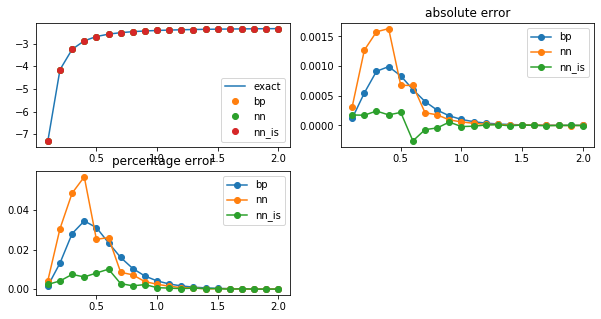

In [12]:
%matplotlib inline
label="fe"
import imp
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

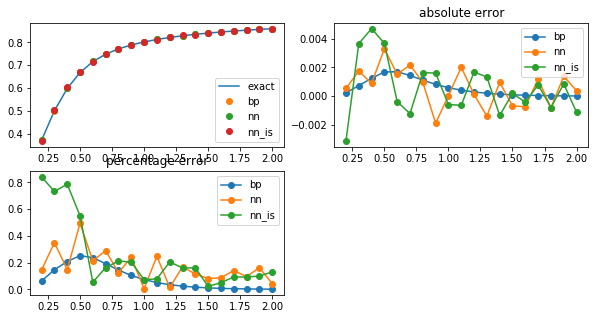

In [13]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
plt.show()

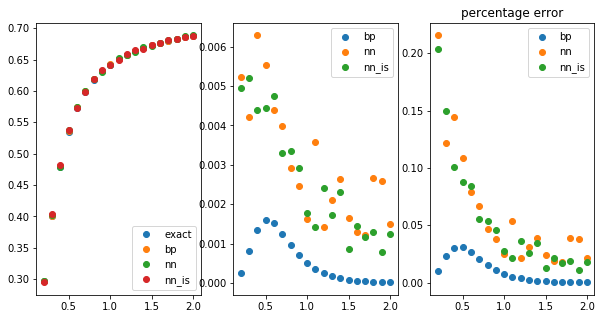

In [14]:
%matplotlib inline
label="M_i"
import imp
imp.reload(solvers)

plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
plt.show()

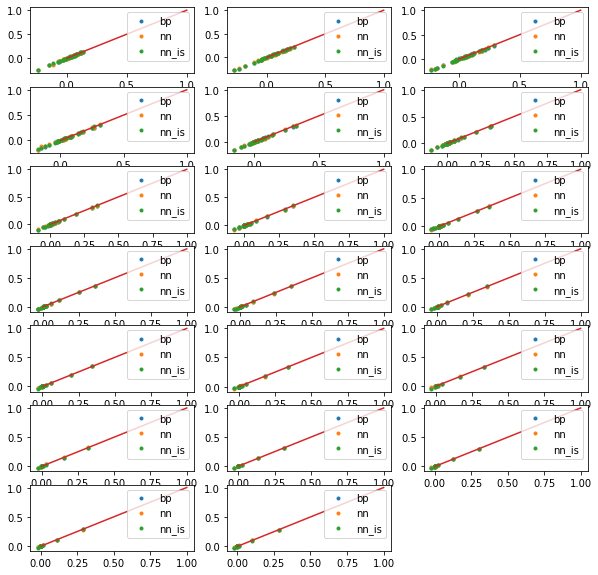

In [15]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas, res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()

NameError: name 'H' is not defined

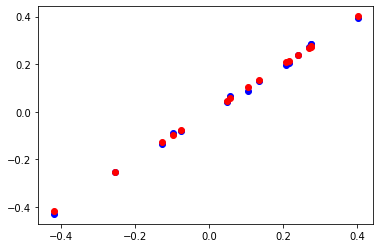

In [16]:
import matplotlib.pyplot as plt
plt.plot(res_ex["M_i"][0], res_nn["M_i"][0], "bo")
plt.plot(res_ex["M_i"][0], res_bp["M_i"][0], "ro")
plt.plot(res_ex["M_i"][0], np.tanh(1e-6*H), "go")


# Plots

<function matplotlib.pyplot.show(*args, **kw)>

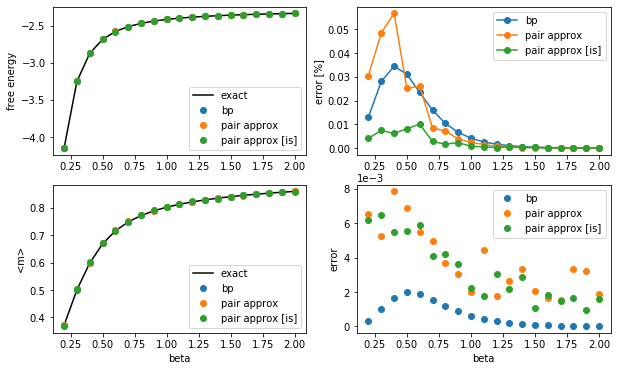

In [17]:
import matplotlib.pyplot as plt
init_ =1
name_file = "spin_glass_rf_2d.pdf"
label="fe"

others = [res_bp, res_nn, res_nn_is]
res_nn["name"] = "pair approx"
res_nn_is["name"] = "pair approx [is]"

plt.figure(figsize=(10,6))
ax1 = plt.subplot(221,)
ax1.set_ylabel("free energy")
plt.plot(res_ex["betas"][init_:], res_ex[label][init_:], label = "exact",
         color="black")
ax1.set_ylabel("free energy")

for other in others:
    plt.plot(other["betas"][init_:], other[label][init_:],"o", label=other["name"],)
plt.legend()
ax3 = plt.subplot(222)
for other in others:
    plt.plot(other["betas"][init_:], 100 * abs(other[label][init_:] - res_ex[label][init_:]) / abs(res_ex[label][init_:] +1e-10), "-o",
             label=other["name"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

ax3.set_ylabel("error [%]")
plt.legend()

label="M_i"

res_nn["name"] = "pair approx"

ax4 = plt.subplot(223,)
ax4.set_ylabel("<m>")
ax4.set_xlabel("beta")

ax4.plot(res_ex["betas"][init_:], abs(res_ex[label][init_:]).sum(axis=1)/model_.N,
             label="exact", color="black")
for other in others:
    ax4.plot(other["betas"][init_:], abs(other[label][init_:]).sum(axis=1)/model_.N, "o",
             label=other["name"])
plt.legend()

ax2 = plt.subplot(224)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

for other in others:
    ax2.plot(other["betas"][init_:], abs(abs(other[label][init_:]) - abs(res_ex[label][init_:])).sum(axis=1)/model_.N, "o",
             label=other["name"])
ax2.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax2.set_xlabel("beta")
ax2.set_ylabel("error")
plt.legend()
plt.savefig("./img/" + name_file)
plt.show